In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# read the hourly data
import pandas as pd
df_hourly = pd.read_csv('data/df_hourly.csv')

In [3]:
time_lags = range(1, 17)
list(time_lags)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [4]:
input_variables = df_hourly.columns.drop(['EQI_original', 'EQI', 'OCI', 't'])
input_variables

Index(['Qi', 'T', 'CODi', 'NH4i', 'TNi', 'TSSi', 'TPi', 'Qintr', 'Qr', 'Qw',
       'Quprimary', 'Quthickener', 'Qodewatering', 'Qmetal', 'DO5', 'DO6',
       'DO6ref', 'DO7', 'Qo', 'CODo', 'NH4o', 'TNo', 'TSSo', 'TPo', 'SC', 'AE',
       'PE', 'ME'],
      dtype='object')

In [5]:
all_lagged_features = []  # List to hold all lagged features DataFrames

# Generate lagged features for each input variable
for variable in input_variables:
    for lag in time_lags:
        lagged_feature = df_hourly[variable].shift(lag).to_frame(f"{variable}{lag}")
        all_lagged_features.append(lagged_feature)

# Concatenate all lagged features into one DataFrame
lagged_data = pd.concat(all_lagged_features, axis=1)

# Remove the rows with NaN values resulting from the lagging
lagged_data = lagged_data.dropna()
lagged_data

,Qi1,Qi2,Qi3,Qi4,Qi5,Qi6,Qi7,Qi8,Qi9,Qi10,...,ME7,ME8,ME9,ME10,ME11,ME12,ME13,ME14,ME15,ME16
16,18976.14125,18978.29825,19139.33775,21817.27975,24678.44875,30445.67200,32402.26700,25338.46725,17258.26525,11766.62050,...,5384.833025,5435.805225,5463.962500,5482.475925,5490.002200,5493.965150,5492.915875,5489.732950,5485.683575,5481.689250
17,20779.02650,18976.14125,18978.29825,19139.33775,21817.27975,24678.44875,30445.67200,32402.26700,25338.46725,17258.26525,...,5323.401650,5384.833025,5435.805225,5463.962500,5482.475925,5490.002200,5493.965150,5492.915875,5489.732950,5485.683575
18,23204.21075,20779.02650,18976.14125,18978.29825,19139.33775,21817.27975,24678.44875,30445.67200,32402.26700,25338.46725,...,5288.548350,5323.401650,5384.833025,5435.805225,5463.962500,5482.475925,5490.002200,5493.965150,5492.915875,5489.732950
19,23500.99000,23204.21075,20779.02650,18976.14125,18978.29825,19139.33775,21817.27975,24678.44875,30445.67200,32402.26700,...,5274.321925,5288.548350,5323.401650,5384.833025,5435.805225,5463.962500,5482.475925,5490.002200,5493.965150,5492.915875
20,24629.89950,23500.99000,23204.21075,20779.02650,18976.14125,18978.29825,19139.33775,21817.27975,24678.44875,30445.67200,...,5280.393725,5274.321925,5288.548350,5323.401650,5384.833025,5435.805225,5463.962500,5482.475925,5490.002200,5493.965150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,20125.54700,16398.35250,13080.57500,12434.69750,11697.40725,11841.50200,14718.20725,16879.73275,20896.39950,23370.55175,...,5732.101650,5756.382800,5796.511800,5853.519150,5902.456225,5931.960125,5948.441550,5953.845650,5951.989750,5946.678675
8732,22280.07700,20125.54700,16398.35250,13080.57500,12434.69750,11697.40725,11841.50200,14718.20725,16879.73275,20896.39950,...,5726.014350,5732.101650,5756.382800,5796.511800,5853.519150,5902.456225,5931.960125,5948.441550,5953.845650,5951.989750
8733,22516.32750,22280.07700,20125.54700,16398.35250,13080.57500,12434.69750,11697.40725,11841.50200,14718.20725,16879.73275,...,5723.269375,5726.014350,5732.101650,5756.382800,5796.511800,5853.519150,5902.456225,5931.960125,5948.441550,5953.845650
8734,18464.83700,22516.32750,22280.07700,20125.54700,16398.35250,13080.57500,12434.69750,11697.40725,11841.50200,14718.20725,...,5722.555225,5723.269375,5726.014350,5732.101650,5756.382800,5796.511800,5853.519150,5902.456225,5931.960125,5948.441550


In [7]:
target_data = df_hourly['OCI'][max(time_lags):]
target_data

16      19246.99750
17      19139.05825
18      19100.66525
19      19324.33525
20      19644.97725
           ...     
8731    20292.58775
8732    20771.57200
8733    20694.71450
8734    20124.94950
8735    19463.83775
Name: OCI, Length: 8720, dtype: float64

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lagged_data, target_data, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a dictionary to hold the best lag and its importance for each variable
best_lags_rf = {}

# Extract the best lag for each variable based on feature importance
for variable in input_variables:
    best_lag = None
    max_importance = 0
    for lag in time_lags:
        importance = feature_importances[X_train.columns.get_loc(f"{variable}{lag}")]
        if importance > max_importance:
            best_lag = lag
            max_importance = importance
    best_lags_rf[variable] = {'lag': best_lag, 'importance': max_importance}

best_lags_rf

{'Qi': {'lag': 2, 'importance': 0.056110964488094994},
 'T': {'lag': 16, 'importance': 0.0031965645926091426},
 'CODi': {'lag': 1, 'importance': 0.0016845691041570295},
 'NH4i': {'lag': 2, 'importance': 0.006421320203541023},
 'TNi': {'lag': 1, 'importance': 0.015562680107116623},
 'TSSi': {'lag': 4, 'importance': 0.0011037088502536079},
 'TPi': {'lag': 1, 'importance': 0.0026065903878798517},
 'Qintr': {'lag': 1, 'importance': 0.0002787086247608407},
 'Qr': {'lag': 16, 'importance': 0.0002742074420151347},
 'Qw': {'lag': 1, 'importance': 0.00010206915128221825},
 'Quprimary': {'lag': 1, 'importance': 0.0001586478246350646},
 'Quthickener': {'lag': 16, 'importance': 0.0003617893912800206},
 'Qodewatering': {'lag': 1, 'importance': 0.016449386350097555},
 'Qmetal': {'lag': 1, 'importance': 0.006728478301832348},
 'DO5': {'lag': 1, 'importance': 0.00036934739951129694},
 'DO6': {'lag': 1, 'importance': 0.00016972968058355338},
 'DO6ref': {'lag': 1, 'importance': 0.0001478221168977496},
 

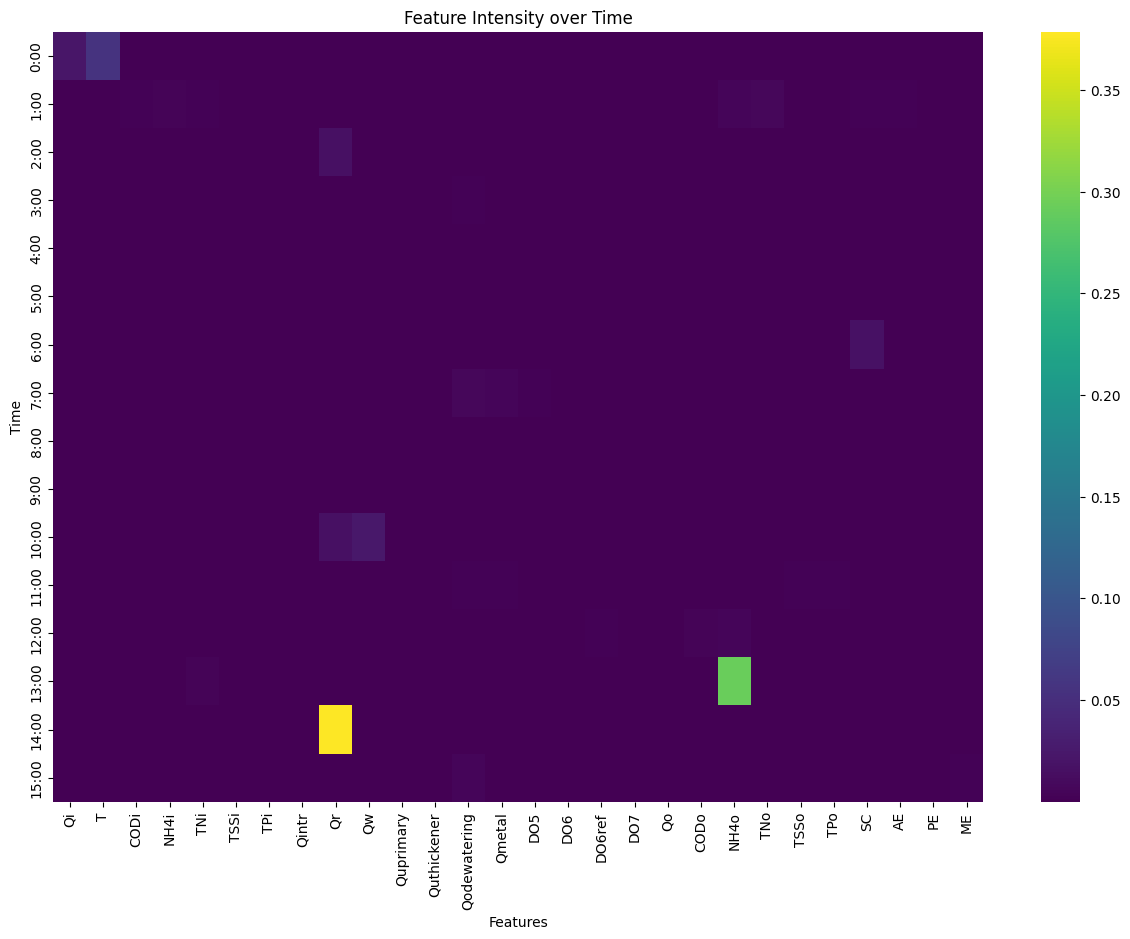

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = feature_importances.reshape(16, 28)

# Create time and feature labels for the axes
time_labels = [f"{i}:00" for i in range(data.shape[0])]
feature_labels = [f"{feature}" for feature in input_variables]

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data, annot=False, fmt=".2f", xticklabels=feature_labels, yticklabels=time_labels, cmap="viridis")

# Adding titles and labels
plt.title("Feature Intensity over Time")
plt.xlabel("Features")
plt.ylabel("Time")

# Show the plot
plt.show()


In [11]:
import numpy as np
def plot_results(model, param='n_estimators'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    mean_train_scores = model.cv_results_['mean_train_score']
    mean_test_scores = model.cv_results_['mean_test_score']
    #train_time = model.cv_results_['mean_fit_time']
    params = list(model.cv_results_[param_name])
    train_score_dict = {}
    test_score_dict = {}
    for train_score, test_score, n_est in zip(mean_train_scores, mean_test_scores, params):
        train_score_dict.setdefault(n_est, []).append(train_score)
        test_score_dict.setdefault(n_est, []).append(test_score)

    # Calculate mean and std dev of scores for each 'n_estimators'
    mean_train_scores = {n_est: np.mean(scores) for n_est, scores in train_score_dict.items()}
    mean_test_scores = {n_est: np.mean(scores) for n_est, scores in test_score_dict.items()}

    # Sort the scores and standard deviations for plotting
    sorted_n_estimators = sorted(mean_train_scores)
    sorted_mean_train_scores = [mean_train_scores[n_est] for n_est in sorted_n_estimators]
    sorted_mean_test_scores = [mean_test_scores[n_est] for n_est in sorted_n_estimators]
    
    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_n_estimators, sorted_mean_train_scores, 'bo-', label='train')
    plt.plot(sorted_n_estimators, sorted_mean_test_scores, 'go-', label='test')
    plt.xlabel(f'{param}')
    plt.ylabel('Mean Score')
    plt.title(f'Effect of {param} on Model Performance')
    plt.legend()
    plt.grid(True)
    plt.show()    

In [12]:
from sklearn import metrics
def evaluate(model, X, y):
    
    pred = model.predict(X)
    mae = metrics.mean_absolute_error(y, pred)
    mse = metrics.mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    
    mape = np.mean(np.abs((y - pred) / np.abs(y)))
    
    errors = abs(pred - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    
    r2= metrics.r2_score(y, pred)
    
    return accuracy, mae, mse, rmse, mape, r2

In [13]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'max_features': [15, 20 , 50, 'sqrt', 'log2', None],
    'n_estimators': [150]
}
model = RandomForestRegressor(random_state=42)
# Define the cross-validation strategy
tscv = TimeSeriesSplit(n_splits=5)

X_train, X_test, y_train, y_test = train_test_split(lagged_data, target_data, test_size=0.1, random_state=42)
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='r2', n_jobs=-1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best score:", best_score)
"""
plot_results(grid_search, param='n_estimators')
plot_results(grid_search, param='max_features')
plot_results(grid_search, param='criterion')
"""

Best hyperparameters: {'max_features': None, 'n_estimators': 150}
Best score: 0.9403146147692392


"\nplot_results(grid_search, param='n_estimators')\nplot_results(grid_search, param='max_features')\nplot_results(grid_search, param='criterion')\n"

In [ ]:
plot_results(grid_search, param='n_estimators')
plot_results(grid_search, param='max_features')
plot_results(grid_search, param='criterion')

In [14]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a dictionary to hold the best lag and its importance for each variable
best_lags_rf = {}

# Extract the best lag for each variable based on feature importance
for variable in input_variables:
    best_lag = None
    max_importance = 0
    for lag in time_lags:
        importance = feature_importances[X_train.columns.get_loc(f"{variable}{lag}")]
        if importance > max_importance:
            best_lag = lag
            max_importance = importance
    best_lags_rf[variable] = {'lag': best_lag, 'importance': max_importance}

best_lags_rf

{'Qi': {'lag': 1, 'importance': 0.022890140349201313},
 'T': {'lag': 16, 'importance': 0.0029284761218126153},
 'CODi': {'lag': 1, 'importance': 0.0014479396577442667},
 'NH4i': {'lag': 2, 'importance': 0.005402377736888483},
 'TNi': {'lag': 1, 'importance': 0.015206881593008065},
 'TSSi': {'lag': 4, 'importance': 0.0007796393267055968},
 'TPi': {'lag': 1, 'importance': 0.0013021771924252717},
 'Qintr': {'lag': 1, 'importance': 0.0003967536423919752},
 'Qr': {'lag': 16, 'importance': 0.00030508747810046894},
 'Qw': {'lag': 1, 'importance': 9.90775593474432e-05},
 'Quprimary': {'lag': 1, 'importance': 0.0002211881083147569},
 'Quthickener': {'lag': 16, 'importance': 0.0003998185318201612},
 'Qodewatering': {'lag': 1, 'importance': 0.015554636332358176},
 'Qmetal': {'lag': 1, 'importance': 0.008830055192281836},
 'DO5': {'lag': 1, 'importance': 0.00035441331996041877},
 'DO6': {'lag': 1, 'importance': 0.0001799172581408944},
 'DO6ref': {'lag': 1, 'importance': 9.968836450009093e-05},
 'D

In [15]:
# evaluate on test set
accuracy, mae, mse, rmse, mape, r2 = evaluate(rf_model, X_test, y_test)

In [16]:
accuracy

98.75899291643563

In [17]:
r2

0.9581475894923812

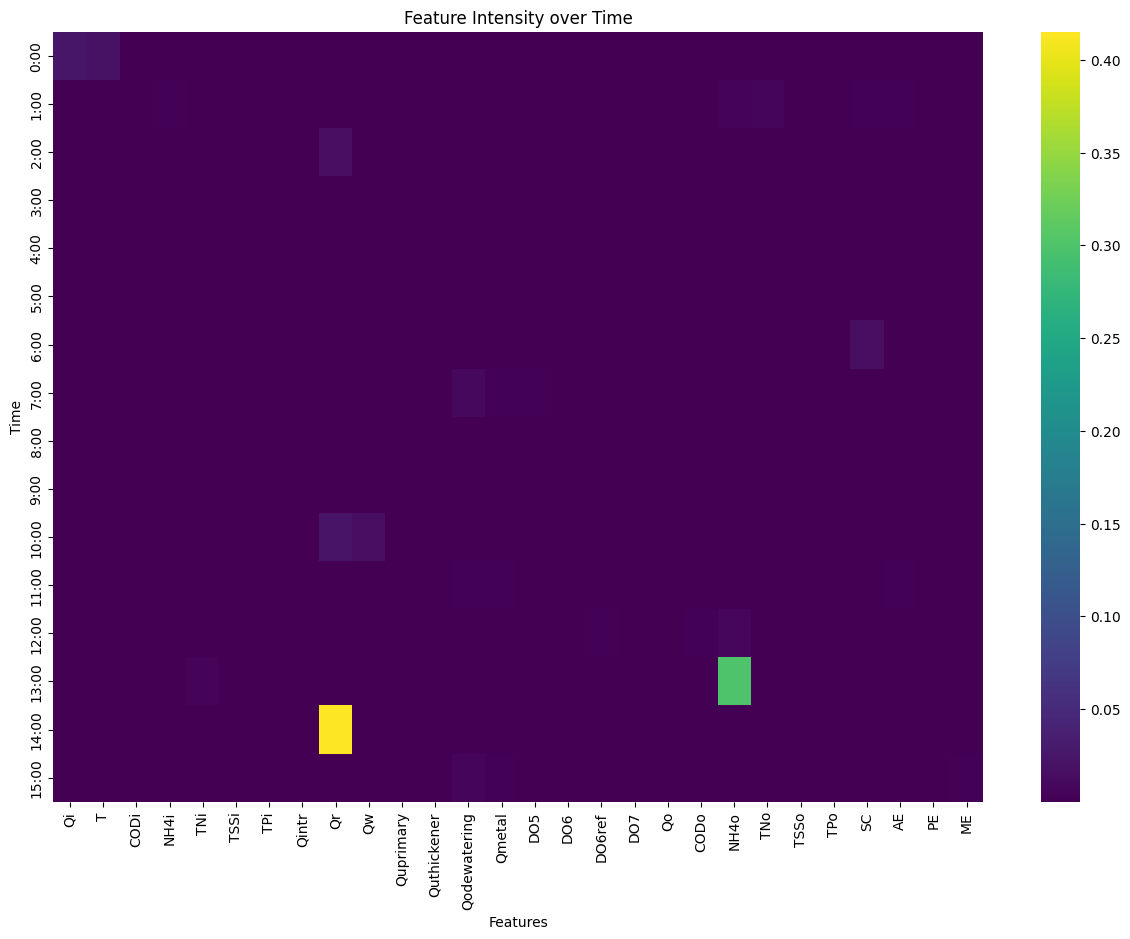

In [18]:

data = feature_importances.reshape(16, 28)

# Create time and feature labels for the axes
time_labels = [f"{i}:00" for i in range(data.shape[0])]
feature_labels = [f"{feature}" for feature in input_variables]

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data, annot=False, fmt=".2f", xticklabels=feature_labels, yticklabels=time_labels, cmap="viridis")

# Adding titles and labels
plt.title("Feature Intensity over Time")
plt.xlabel("Features")
plt.ylabel("Time")

# Show the plot
plt.show()


In [56]:
# param grid for xgboost
param_grid = {"max_depth":    [1, 2, 3, 4, 5, 6, 10],
              "n_estimators": [200, 250, 300, 350],
              "learning_rate": [ 0.05, 0.1, 0.01],
             'subsample': [0.5, 0.7, 1],
             'min_child_weight': [0, 2, 4, 6, 8, 20],
             'booster': ['gbtree'],
              'tree_method': ['auto', 'exact', 'approx', 'hist']
             }

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=42)
# Define the cross-validation strategy
tscv = TimeSeriesSplit(n_splits=5)

X_train, X_test, y_train, y_test = train_test_split(lagged_data, target_data, test_size=0.1, random_state=42)
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='r2', n_jobs=-1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best score:", best_score)

plot_results(grid_search, param='n_estimators')
plot_results(grid_search, param='max_depth')
plot_results(grid_search, param='learning_rate')
plot_results(grid_search, param='subsample')
plot_results(grid_search, param='min_child_weight')
plot_results(grid_search, param='tree_method')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


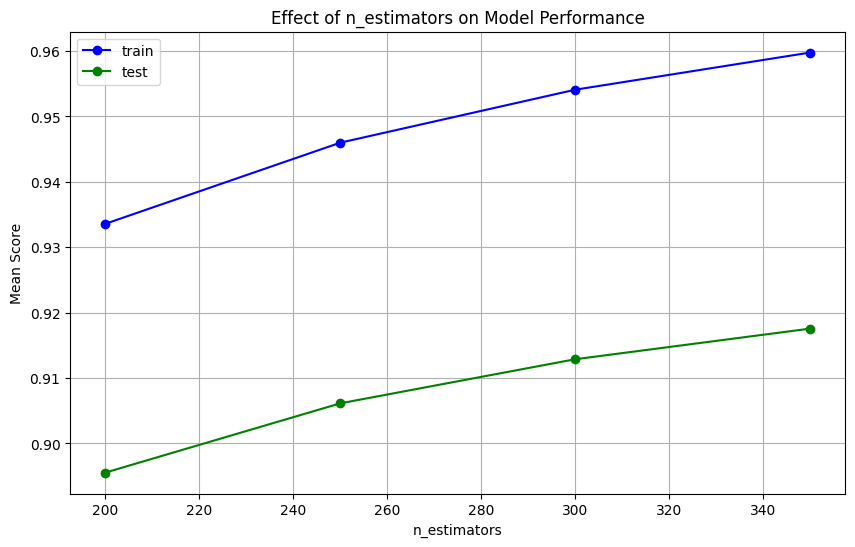

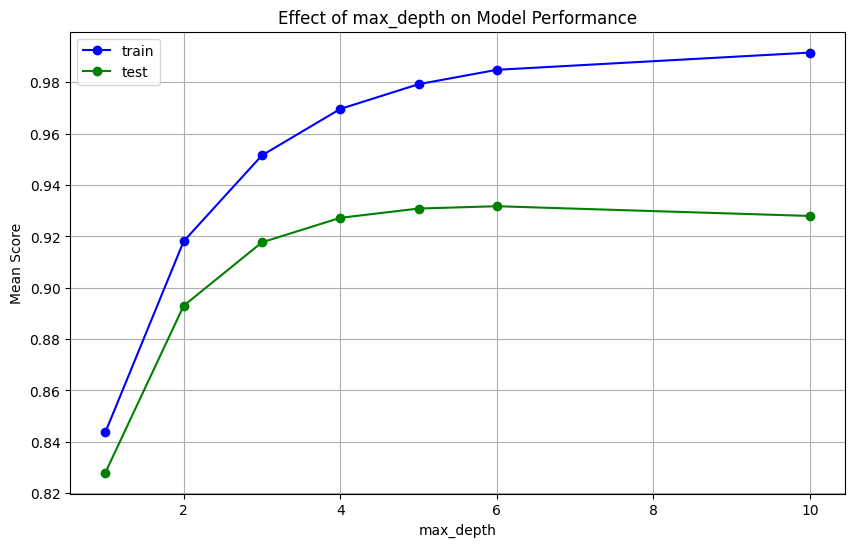

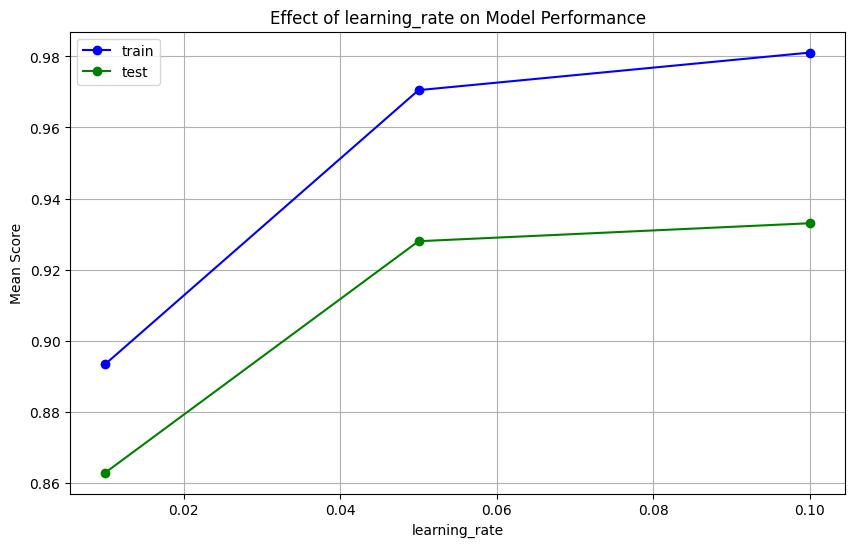

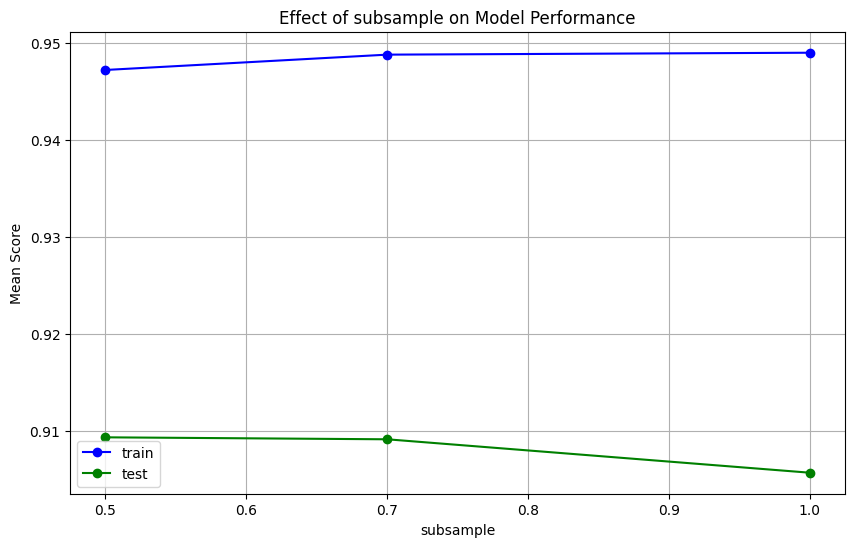

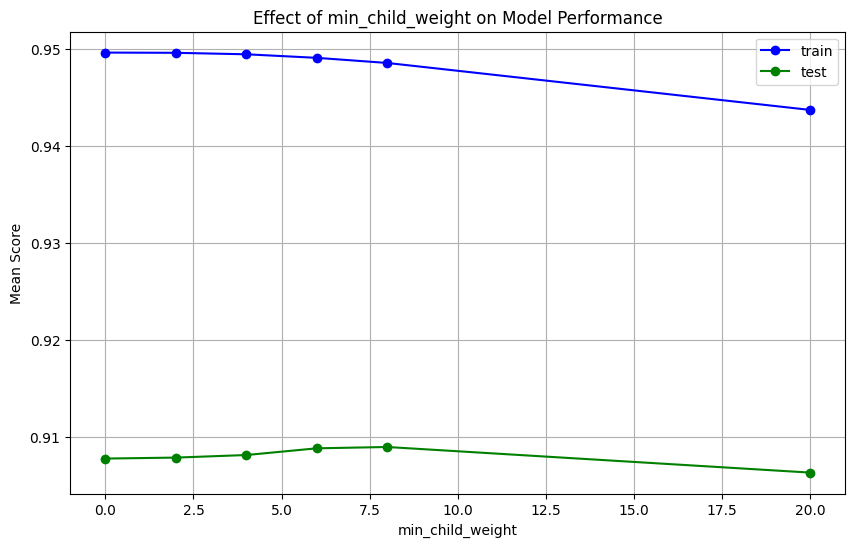

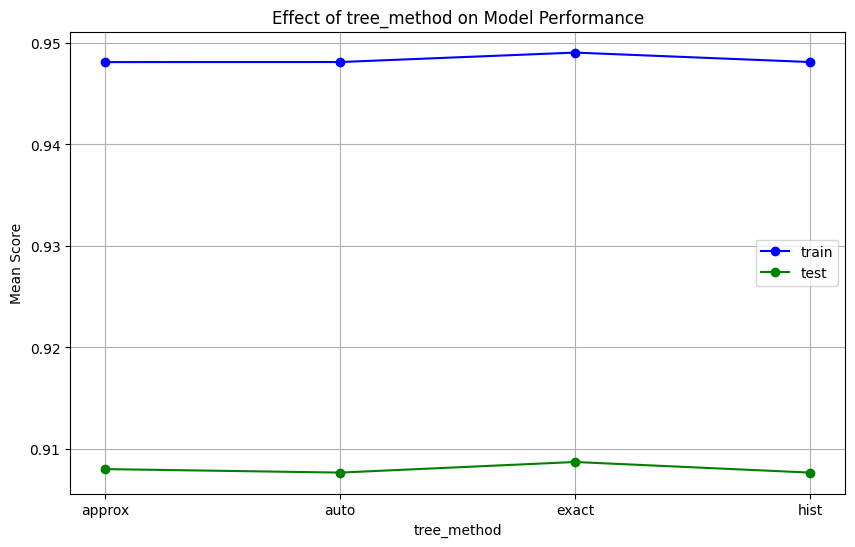

In [58]:
plot_results(grid_search, param='n_estimators')
plot_results(grid_search, param='max_depth')
plot_results(grid_search, param='learning_rate')
plot_results(grid_search, param='subsample')
plot_results(grid_search, param='min_child_weight')
plot_results(grid_search, param='tree_method')

In [59]:
print("Best hyperparameters:", best_params)
print("Best score:", best_score)

Best hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 350, 'subsample': 0.5, 'tree_method': 'approx'}
Best score: 0.9457063625686374


In [20]:
# Initialize the Random Forest model
import xgboost as xgb
xg_model = xgb.XGBRegressor(booster='gbtree', learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=350, subsample=0.5, tree_method='approx', random_state=42, n_jobs=-1)

# Train the model
xg_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a dictionary to hold the best lag and its importance for each variable
best_lags_rf = {}

# Extract the best lag for each variable based on feature importance
for variable in input_variables:
    best_lag = None
    max_importance = 0
    for lag in time_lags:
        importance = feature_importances[X_train.columns.get_loc(f"{variable}{lag}")]
        if importance > max_importance:
            best_lag = lag
            max_importance = importance
    best_lags_rf[variable] = {'lag': best_lag, 'importance': max_importance}

best_lags_rf

{'Qi': {'lag': 1, 'importance': 0.022890140349201313},
 'T': {'lag': 16, 'importance': 0.0029284761218126153},
 'CODi': {'lag': 1, 'importance': 0.0014479396577442667},
 'NH4i': {'lag': 2, 'importance': 0.005402377736888483},
 'TNi': {'lag': 1, 'importance': 0.015206881593008065},
 'TSSi': {'lag': 4, 'importance': 0.0007796393267055968},
 'TPi': {'lag': 1, 'importance': 0.0013021771924252717},
 'Qintr': {'lag': 1, 'importance': 0.0003967536423919752},
 'Qr': {'lag': 16, 'importance': 0.00030508747810046894},
 'Qw': {'lag': 1, 'importance': 9.90775593474432e-05},
 'Quprimary': {'lag': 1, 'importance': 0.0002211881083147569},
 'Quthickener': {'lag': 16, 'importance': 0.0003998185318201612},
 'Qodewatering': {'lag': 1, 'importance': 0.015554636332358176},
 'Qmetal': {'lag': 1, 'importance': 0.008830055192281836},
 'DO5': {'lag': 1, 'importance': 0.00035441331996041877},
 'DO6': {'lag': 1, 'importance': 0.0001799172581408944},
 'DO6ref': {'lag': 1, 'importance': 9.968836450009093e-05},
 'D

In [21]:
# evaluate on test set
accuracy, mae, mse, rmse, mape, r2 = evaluate(xg_model, X_test, y_test)

In [22]:
r2

0.9801668360065598

In [23]:
rmse

233.1013832317547

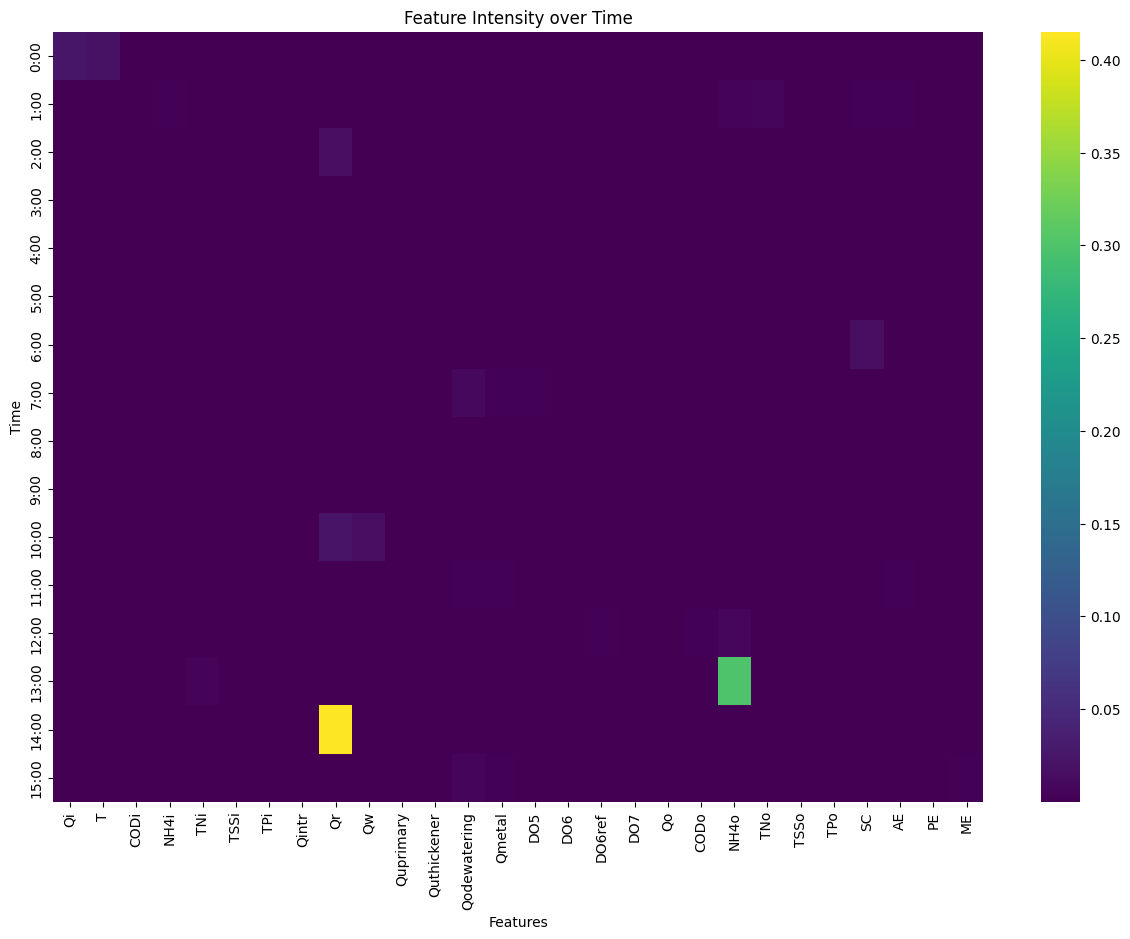

In [24]:

data = feature_importances.reshape(16, 28)

# Create time and feature labels for the axes
time_labels = [f"{i}:00" for i in range(data.shape[0])]
feature_labels = [f"{feature}" for feature in input_variables]

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data, annot=False, fmt=".2f", xticklabels=feature_labels, yticklabels=time_labels, cmap="viridis")

# Adding titles and labels
plt.title("Feature Intensity over Time")
plt.xlabel("Features")
plt.ylabel("Time")

# Show the plot
plt.show()